# US Presidential Election 2020

In [34]:
import sys
import os
from collections import Counter

In [2]:
sys.path.append(os.path.abspath('src'))

In [3]:
from src import preprocessing, topic_modeling, deepseek, misc_utils, train_model

c:\Users\danie\Coding\CSE6242_project\project6242\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Define the configuration file path
config_path = 'conf/config.yaml'

In [ ]:
# Run the preprocessing pipeline - Takes very long ~30mins
english_tweets = preprocessing.run_preprocessing_pipeline(config_path)

In [5]:
dtm_results = topic_modeling.topic_modeling_preprocessing(config_path)

Loading dataset...
Processing the CounterVectorizer and TfidfVectorizer
Processing 'biden' dataset...
Processing 'trump' dataset...
Processing 'both' dataset...
Topic Modeling Preprocessing Complete!


# Topic Modeling

In [7]:
training_path = 'conf/train_model.yaml'
tfidf_vect= dtm_results['vectorizer']['tfidf_vectorizer']
vocab = tfidf_vect.get_feature_names_out()

In [26]:
trump_tfidf_dtm = dtm_results['trump']['tfidf_dtm']
trump_top_models, trump_optimal_topic_list= train_model.training_pipeline(training_path, size =20, dtm= trump_tfidf_dtm, vectorizer=tfidf_vect, random_seed = 42, sample_size = 10000, topn = 10)

Loading config...
Loading parameters from config...
Generating a small training sample...
Converting DTM to csr_matrix...
Generated random seeds: [7271  861 5391 5192 5735 6266  467 4427 5579 8323 1686  770 6950 2434
 5312 5052 6421 1185 4556 3386]
Running LDA with different seeds...
Training LDA with seed 7271...
Retraining with best parameters for seed 7271...
Calculating mean UMass coherence score for seed 7271...
Generating pyLDAvis for seed 7271...
Training LDA with seed 861...
Retraining with best parameters for seed 861...
Calculating mean UMass coherence score for seed 861...
Generating pyLDAvis for seed 861...
Training LDA with seed 5391...
Retraining with best parameters for seed 5391...
Calculating mean UMass coherence score for seed 5391...
Generating pyLDAvis for seed 5391...
Training LDA with seed 5192...
Retraining with best parameters for seed 5192...
Calculating mean UMass coherence score for seed 5192...
Generating pyLDAvis for seed 5192...
Training LDA with seed 5735

In [27]:
#Get the best model out and plot it
model, display, score, seed, component = trump_top_models[0]
print(f"\nTop Model: Seed={seed}, Score={score}")
train_model.display_pyldavis(display)


Top Model: Seed=1185, Score=-2.9219067144199085


In [28]:
trump_component_0 = trump_top_models[0][4]
trump_topic_words_0 = train_model.top_words_from_topic(trump_component_0, vocab)

Topic 0 words: voice|done|market|electionresults|power|america|best|elections|starting|redwave
Topic 1 words: people|american|counteveryvote|yesterday|power|done|voice|corruption|local|america
Topic 2 words: local|done|landslide|people|voice|though|time|trumptrain|wallstreet|going


In [29]:
trump_component_1 = trump_top_models[1][4]
trump_topic_words_1 = train_model.top_words_from_topic(trump_component_1, vocab)

Topic 0 words: voice|done|market|electionresults|power|best|elections|america|starting|google
Topic 1 words: done|counteveryvote|congratulation|people|local|power|time|proud|voice|american
Topic 2 words: local|people|done|voice|though|landslide|yesterday|america|power|resist


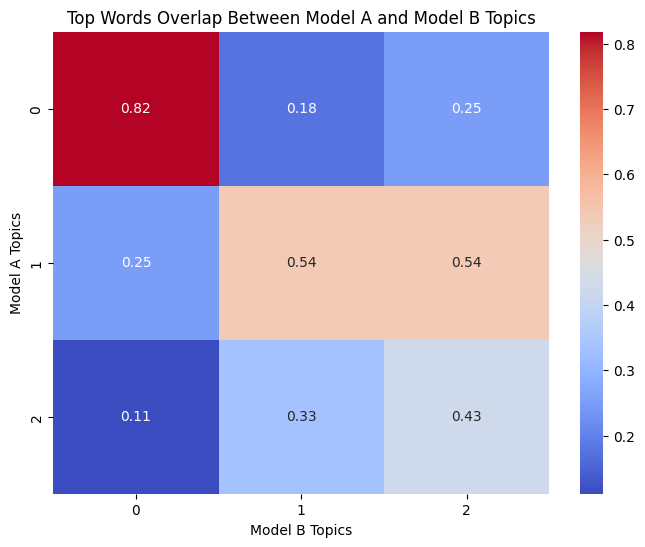

In [30]:
train_model.similarity_heatmap(trump_topic_words_0, trump_topic_words_1)

In [35]:
Counter(trump_optimal_topic_list)

Counter({3: 19, 4: 1})

c:\Users\danie\Coding\CSE6242_project\project6242\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


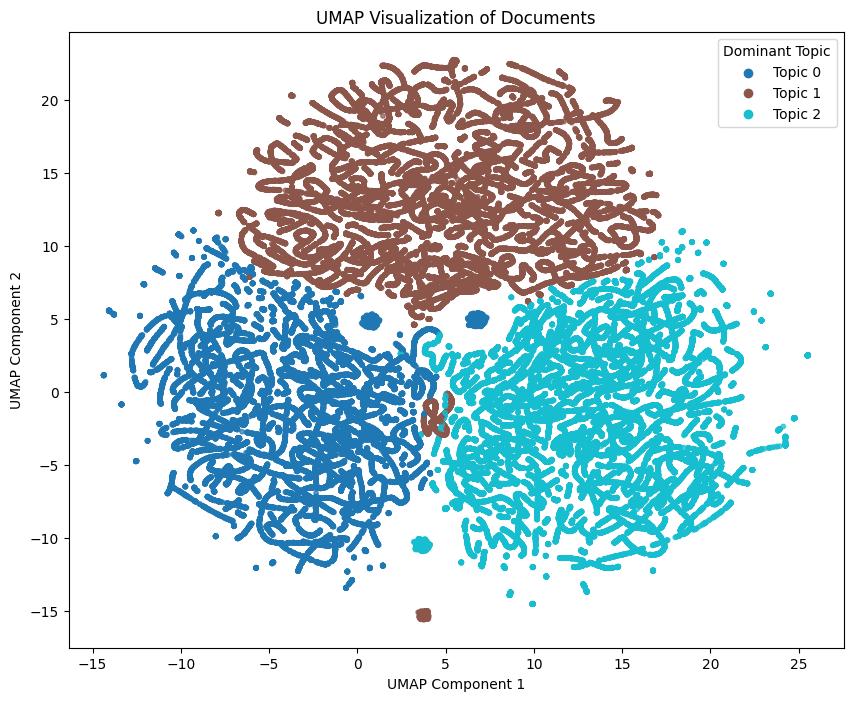

In [31]:
trump_doc_matrix =  train_model.document_topic_matrix(trump_top_models[0][0], trump_tfidf_dtm)
train_model.umap_visualization(trump_doc_matrix)

## Biden

In [8]:
biden_tfidf_dtm = dtm_results['biden']['tfidf_dtm']
biden_top_models, biden_optimal_topic_list= train_model.training_pipeline(training_path, size = 20, dtm= biden_tfidf_dtm, vectorizer=tfidf_vect, random_seed = 42, sample_size = 10000, topn = 10)

Loading config...
Loading parameters from config...
Generating a small training sample...
Converting DTM to csr_matrix...
Generated random seeds: [7271  861 5391 5192 5735 6266  467 4427 5579 8323 1686  770 6950 2434
 5312 5052 6421 1185 4556 3386]
Running LDA with different seeds...
Training LDA with seed 7271...
Retraining with best parameters for seed 7271...
Calculating mean UMass coherence score for seed 7271...
Generating pyLDAvis for seed 7271...
Training LDA with seed 861...
Retraining with best parameters for seed 861...
Calculating mean UMass coherence score for seed 861...
Generating pyLDAvis for seed 861...
Training LDA with seed 5391...
Retraining with best parameters for seed 5391...
Calculating mean UMass coherence score for seed 5391...
Generating pyLDAvis for seed 5391...
Training LDA with seed 5192...
Retraining with best parameters for seed 5192...
Calculating mean UMass coherence score for seed 5192...
Generating pyLDAvis for seed 5192...
Training LDA with seed 5735

In [9]:
model, display, score, seed, component = biden_top_models[0]
print(f"\nTop Model: Seed={seed}, Score={score}")
train_model.display_pyldavis(display)


Top Model: Seed=467, Score=-2.9476019061415726


In [10]:
biden_component_0 = biden_top_models[0][4]
biden_topic_words_0 = train_model.top_words_from_topic(biden_component_0, vocab)

Topic 0 words: later|israel|iran|civil|trumpispathetic|lied|flip|virginia|course|wrong
Topic 1 words: later|trumpispathetic|virginia|problem|mailinballots|yesterday|please|took|tiktok|outcome
Topic 2 words: later|virginia|left|problem|amazon|bidenharris|votecount|every|hold|trumpispathetic


In [11]:
biden_component_1 = biden_top_models[1][4]
biden_topic_words_1 = train_model.top_words_from_topic(biden_component_1, vocab)

Topic 0 words: later|virginia|problem|street|trumpispathetic|every|playing|guy|local|music
Topic 1 words: later|trumpispathetic|virginia|please|lied|mailinballots|wrong|wallstreet|americafirst|civil
Topic 2 words: later|virginia|left|problem|bidenharris|votecount|amazon|hold|mailinballots|trumpispathetic


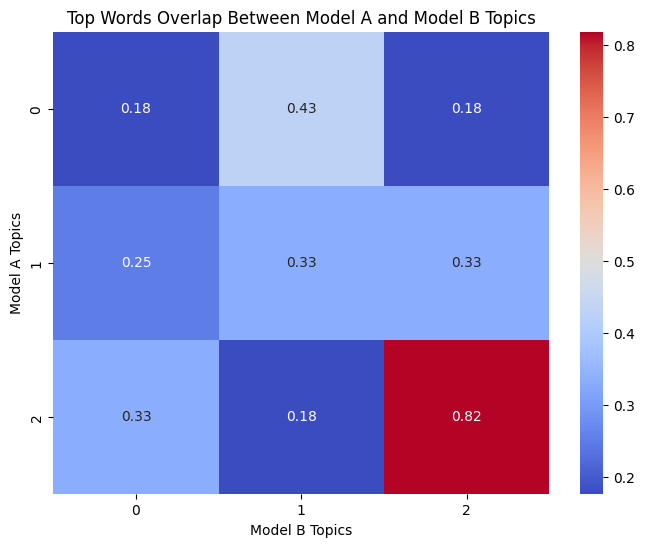

In [12]:
train_model.similarity_heatmap(biden_topic_words_0, biden_topic_words_1)

c:\Users\danie\Coding\CSE6242_project\project6242\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


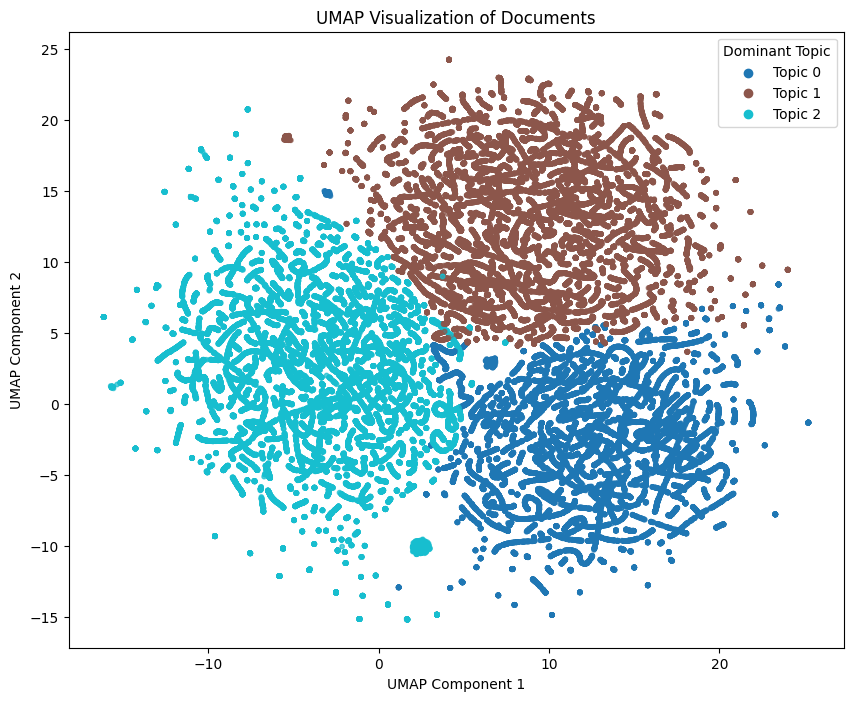

In [32]:
biden_doc_matrix =  train_model.document_topic_matrix(biden_top_models[0][0], biden_tfidf_dtm)
train_model.umap_visualization(biden_doc_matrix)

In [36]:
Counter(biden_optimal_topic_list)

Counter({3: 14, 4: 3, 5: 3})

In [18]:
both_tfidf_dtm = dtm_results['both']['tfidf_dtm']
both_top_models, both_optimal_topic_list= train_model.training_pipeline(training_path, size = 20, dtm= both_tfidf_dtm, vectorizer=tfidf_vect, random_seed = 42, sample_size = 10000, topn = 10)

Loading config...
Loading parameters from config...
Generating a small training sample...
Converting DTM to csr_matrix...
Generated random seeds: [7271  861 5391 5192 5735 6266  467 4427 5579 8323 1686  770 6950 2434
 5312 5052 6421 1185 4556 3386]
Running LDA with different seeds...
Training LDA with seed 7271...
Retraining with best parameters for seed 7271...
Calculating mean UMass coherence score for seed 7271...
Generating pyLDAvis for seed 7271...
Training LDA with seed 861...
Retraining with best parameters for seed 861...
Calculating mean UMass coherence score for seed 861...
Generating pyLDAvis for seed 861...
Training LDA with seed 5391...
Retraining with best parameters for seed 5391...
Calculating mean UMass coherence score for seed 5391...
Generating pyLDAvis for seed 5391...
Training LDA with seed 5192...
Retraining with best parameters for seed 5192...
Calculating mean UMass coherence score for seed 5192...
Generating pyLDAvis for seed 5192...
Training LDA with seed 5735

In [20]:
model, display, score, seed, component = both_top_models[0]
print(f"\nTop Model: Seed={seed}, Score={score}")
train_model.display_pyldavis(display)


Top Model: Seed=5052, Score=-2.715811382909889


In [21]:
both_component_0 = both_top_models[0][4]
both_topic_words_0 = train_model.top_words_from_topic(both_component_0, vocab)

Topic 0 words: joebiden|donaldtrump|debate|election|president|vote|kamalaharris|maga|presidential|america
Topic 1 words: vote|election|electionday|joebiden|electionnight|donaldtrump|lead|state|georgia|pennsylvania
Topic 2 words: joebiden|vote|like|people|donaldtrump|would|election|know|want|president


In [22]:
both_component_1 = both_top_models[1][4]
both_topic_words_1 = train_model.top_words_from_topic(both_component_1, vocab)

Topic 0 words: vote|election|electionday|joebiden|state|donaldtrump|electionnight|lead|poll|georgia
Topic 1 words: joebiden|debate|donaldtrump|president|vote|time|know|like|year|election
Topic 2 words: joebiden|donaldtrump|vote|election|america|maga|politics|people|like|voting


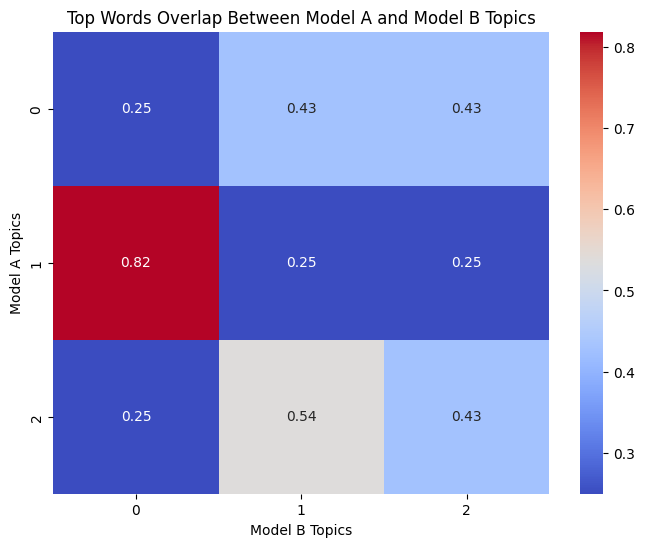

In [23]:
train_model.similarity_heatmap(both_topic_words_0, both_topic_words_1)

In [37]:
Counter(both_optimal_topic_list)

Counter({3: 9, 4: 7, 5: 4})

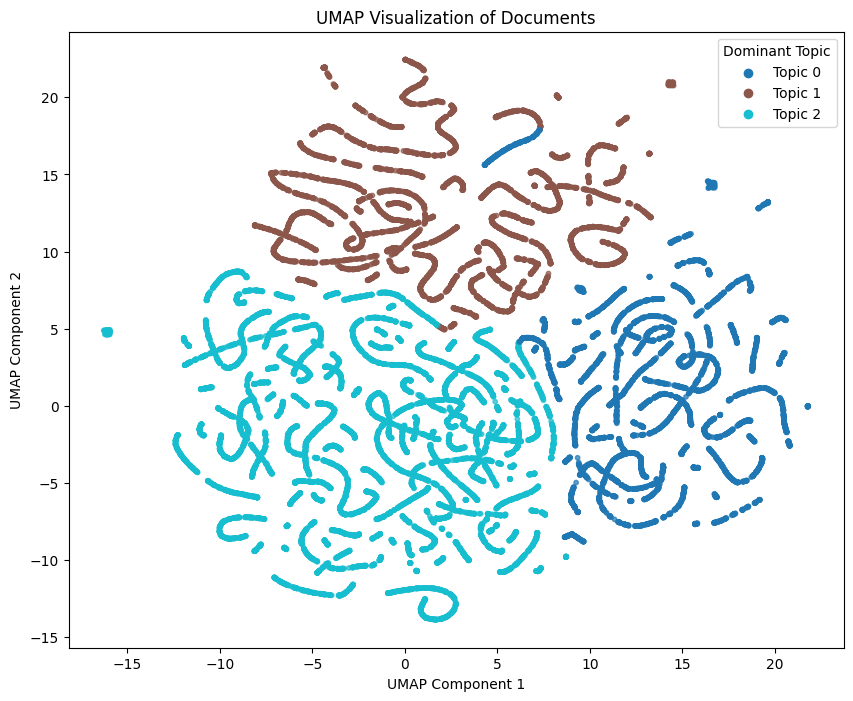

In [25]:
both_doc_matrix =  train_model.document_topic_matrix(both_top_models[0][0], both_tfidf_dtm)
train_model.umap_visualization(both_doc_matrix)

# EDA

In [6]:
english_tweets = pd.read_csv('data/english_tweets.csv')

In [ ]:
english_tweets.info()

In [ ]:
#Check to make sure that all the values are present
print(english_tweets['tweet'].nunique())
print(english_tweets['clean_tweet'].nunique())

In [ ]:
results_xlm = pd.read_csv('data/results_xlm.csv')
print(results_xlm['sentiment'].value_counts())

In [ ]:
results_xlm.info()

In [13]:
results_xlm = english_tweets.merge(results_xlm, on= 'clean_tweet', how = 'left')

In [ ]:
results_xlm.info()

In [ ]:
#Do the following checks so that make sure all the rows are present
print(results_xlm['hashtag'].value_counts())
print(results_xlm['sentiment'].unique())
assert ((results_xlm['confidence'] >= 0.0) & (results_xlm['confidence'] <= 1.0)).all(),"Found confidence values outside the range [0.0, 1.0]"
print(results_xlm['clean_tweet'].nunique())
print(results_xlm['tweet'].nunique())
print(results_xlm['user_followers_count'].min())

In [20]:
#Fill up the na value with unknown for source
results_xlm['source'] = results_xlm['source'].fillna('unknown')

In [ ]:
results_xlm.info()

In [ ]:
#Engagement function
results_xlm['engagement'] = misc_utils.engagement_score(results_xlm['likes'], results_xlm['retweet_count'], results_xlm['user_followers_count'])
print(results_xlm.info())

In [ ]:
print(results_xlm['engagement'].max())
print(results_xlm['engagement'].min())

In [ ]:
results_xlm[results_xlm['engagement'] == results_xlm['engagement'].max()][['likes', 'retweet_count', 'user_followers_count']]

In [ ]:
results_xlm['normalized_score'] = misc_utils.normalization(results_xlm['engagement'], results_xlm['sentiment'], results_xlm['confidence'])
results_xlm.info()

In [ ]:
print(results_xlm['normalized_score'].min())
print(results_xlm['normalized_score'].max())

### Correlation between engagement and user_followers_count, lkes and retweets

In [ ]:
# Create a scatter plot for engagement vs. user followers count
plt.figure(figsize=(10, 6))
plt.scatter(results_xlm['user_followers_count'], results_xlm['engagement'], alpha=0.6)

# Add title and labels
plt.title('Engagement vs. User Followers Count', fontsize=16)
plt.xlabel('User Followers Count', fontsize=12)
plt.ylabel('Engagement', fontsize=12)

# Set logarithmic scale for x-axis (optional, if follower counts vary a lot)
plt.xscale('log')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
# Calculate IQR for Engagement
Q1 = results_xlm['engagement'].quantile(0.25)  # 25th percentile
Q3 = results_xlm['engagement'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Set the upper bound (filter out high engagement values)
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with extremely high engagement
filtered_df = results_xlm[results_xlm['engagement'] <= upper_bound]

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['user_followers_count'], filtered_df['engagement'], alpha=0.6)

# Add title and labels
plt.title('Engagement vs. User Followers Count (Filtered)', fontsize=16)
plt.xlabel('User Followers Count', fontsize=12)
plt.ylabel('Engagement', fontsize=12)

# Optional: Use log scale for better visibility if follower counts vary widely
plt.xscale('log')

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Distribution of user posting across 


In [ ]:
### Max_tweet_count
# Get the top 20 users with the highest tweet counts
top_users = results_xlm['user_id'].value_counts().head(20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Top 20 Users by Number of Tweets', fontsize=16)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
# Get the number of tweets per user
tweet_counts = results_xlm['user_id'].value_counts()

# Plot a histogram of tweet counts
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(tweet_counts, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)

# Add counts on top of each bin
for i in range(len(patches)):
    # Calculate the position for the text label
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i], int(n[i]), 
             ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Distribution of Tweets per User', fontsize=16)
plt.xlabel('Number of Tweets', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Show the plot
plt.show()

In [ ]:
### Lets see how many tweets are by this user
highest_tweet_user = results_xlm['user_id'].value_counts().idxmax()
#Get all the tweets by this highest-tweet_user
highest_tweet_user_tweets = results_xlm[results_xlm['user_id']==highest_tweet_user][['clean_tweet', 'days_from_join_date']]
print(highest_tweet_user_tweets)

In [ ]:

# Group the tweets by 'days_from_join_date' and count the number of tweets for each day
tweet_count_by_days = highest_tweet_user_tweets['days_from_join_date'].value_counts().sort_index()

# Plot the result using a bar plot
plt.figure(figsize=(10, 6))
tweet_count_by_days.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title(f'Number of Tweets vs. Days from Join Date for User {highest_tweet_user}', fontsize=16)
plt.xlabel('Days from Join Date', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

# Rotate x-axis labels for better readability (if there are many days)
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Correlation between user_followers_count vs likes and retweets

In [ ]:
#see how many likes and retweets are there when the followers_count =0
print(results_xlm[results_xlm['user_followers_count'] == 0][['likes']].value_counts())
print(results_xlm[results_xlm['user_followers_count'] == 0][['retweet_count']].value_counts())

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for user_followers_count vs likes
axes[0].scatter(results_xlm['user_followers_count'], results_xlm['likes'], alpha=0.5)
axes[0].set_title('User Followers Count vs Likes', fontsize=14)
axes[0].set_xlabel('User Followers Count', fontsize=12)
axes[0].set_ylabel('Likes', fontsize=12)

# Scatter plot for user_followers_count vs retweet_count
axes[1].scatter(results_xlm['user_followers_count'], results_xlm['retweet_count'], alpha=0.5)
axes[1].set_title('User Followers Count vs Retweet Count', fontsize=14)
axes[1].set_xlabel('User Followers Count', fontsize=12)
axes[1].set_ylabel('Retweet Count', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Sentiment distribution among tweets

In [ ]:
# Calculate sentiment distribution for each hashtag group
trump_sentiment = results_xlm[results_xlm['hashtag'] == 'trump']['sentiment'].value_counts()
biden_sentiment = results_xlm[results_xlm['hashtag'] == 'biden']['sentiment'].value_counts()
both_sentiment = results_xlm[results_xlm['hashtag'] == 'both']['sentiment'].value_counts()

# Create a DataFrame to combine all sentiment counts
sentiment_df = pd.DataFrame({
    'trump': trump_sentiment,
    'biden': biden_sentiment,
    'both': both_sentiment
}).fillna(0)  # Fill NaN with 0 for missing sentiment categories

# Plot the sentiment distribution
sentiment_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add title and labels
plt.title('Sentiment Distribution by Hashtag', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

#Make the labels upright
plt.xticks(rotation=0)

# Show the plot
plt.legend(title='Hashtag')
plt.show()

### Number of days from joined date

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(results_xlm['days_from_join_date'], bins=30, edgecolor='black')
plt.title('Distribution of Days from Join Date')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

### Sentiment of tweets generated throughout the day

In [ ]:
# Ensure the 'created_time' column is treated as integers (0-23 hours)
results_xlm['created_time'] = results_xlm['created_time'].astype(int)

# Group by 'created_time' and 'sentiment' to get the sentiment distribution per hour
hourly_sentiment_distribution = results_xlm.groupby(['created_time', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment distribution as a stacked bar plot
plt.figure(figsize=(12, 6))
hourly_sentiment_distribution.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# Add title and axis labels
plt.title('Sentiment Distribution Across Hours of the Day', fontsize=16)
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

# Customize x-axis labels and gridlines
plt.xticks(rotation=0)  # Keep x-axis labels upright
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend with a title
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Find the distribution of sentiment across state

In [ ]:
# Group data by state and sentiment to count occurrences
state_sentiment_distribution = results_xlm.groupby(['state', 'sentiment']).size().unstack(fill_value=0)

# Sentiment Distribution per State (Stacked Bar Plot)
plt.figure(figsize=(15, 8))
state_sentiment_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 8))

plt.title('Sentiment Distribution Across States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count of Sentiments', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()